In [1]:
from keras.datasets import fashion_mnist as data
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:


def sigmoid(z):
    a=1/(1+np.exp(-z))
    return(a)

def relu(Z):

    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    return A

def reluGradient(z):

    
    dZ = np.zeros(z.shape) 
    

    dZ[z > 0] = 1
    
    assert (dZ.shape == z.shape)
    
    return dZ


def softmax(z):
    num=np.exp(z)
    den=np.sum(np.exp(z),axis=0)
    a=num/den
    return(a)

def feedforward(params,layers,X):
    
    a=X
    n=len(layers)-1
    Z=[]
    A=[]
    A.append(X)
    Z.append(X)
    for i in range(1,len(layers)-1):
        W=params["W"+str(i)]
        b=params["b"+str(i)]
        z = np.dot(W,a)+b
        a = relu(z)
        A.append(a)
        Z.append(z)
    W=params["W"+str(n)]
    b=params["b"+str(n)]
    z = np.dot(W,a)+b
    a = sigmoid(z)
    Z.append(z)
    A.append(a)
    return(A,Z)


def sigmoidGradient(z):
    a=sigmoid(z)
    return(a*(1-a))

def backwardPropagate(params, layers,Z,A,alpha,Y):
    m=Y.shape[1]
    l=len(layers)-1
    dz= A[l]-Y
    gradients={}
    while(l>=0):
        dw = np.dot(dz,np.transpose(A[l-1]))/m
        db = np.sum(dz,axis=1)/m 
        db=db.reshape(db.shape[0],1)
        gradients["dw"+str(l)]=dw
        gradients["db"+str(l)]=db
        if(l>=2):
            da= np.dot(np.transpose(params["W"+str(l)]), dz)
            dz = da*reluGradient(Z[l-1])
        l=l-1
    return(gradients)
        
def crossEntropyError(a,Y):
    m=a.shape[1]
    #error=-(np.sum(np.sum(Y*np.log(a),axis=1),axis=0)/m)
    error=-np.sum(Y*np.log(a)+(1-Y)*np.log(1-a))/m
    return(error)
     
def squaredError(a,Y):
    m=a.shape[1]
    error=np.sum(np.square(a-Y),axis=1)/m
    return(error)

# m is number of examples
def updateWeights(params, gradients, layers, alpha,gamma1,gamma2,eps,t):
    M_c={}
    R_c={}
    for i in range(1,len(layers)):
        M["W"+str(i)]=gamma1*M["W"+str(i)]+(1-gamma1)*gradients["dw"+str(i)]
        M["b"+str(i)]=gamma1*M["b"+str(i)]+(1-gamma1)*gradients["db"+str(i)]
        M_c["W"+str(i)]=M["W"+str(i)]/(1-np.power(gamma1,t))
        M_c["b"+str(i)]=M["b"+str(i)]/(1-np.power(gamma1,t))
        R["W"+str(i)]=gamma2*R["W"+str(i)]+(1-gamma2)*np.power(gradients["dw"+str(i)],2)
        R["b"+str(i)]=gamma2*R["b"+str(i)]+(1-gamma2)*np.power(gradients["db"+str(i)],2)
        R_c["W"+str(i)]=R["W"+str(i)]/(1-np.power(gamma2,t))
        R_c["b"+str(i)]=R["b"+str(i)]/(1-np.power(gamma2,t))
        params["W"+str(i)]-= (alpha*M_c["W"+str(i)])/(np.sqrt(R_c["W"+str(i)])+eps)
        params["b"+str(i)]-= (alpha*M_c["b"+str(i)])/(np.sqrt(R_c["b"+str(i)])+eps)







def initialize_weights():
  seed=3
  np.random.seed(seed)
  for i in range(1,len(layers)):
      params["W"+str(i)]=np.random.randn(layers[i],layers[i-1])*np.sqrt(2 / layers[i-1])
      params["b"+str(i)]=np.zeros([layers[i],1])
      M["W"+str(i)]=np.zeros([layers[i],layers[i-1]])
      M["b"+str(i)]=np.zeros([layers[i],1])
      R["W"+str(i)]=np.zeros([layers[i],layers[i-1]])
      R["b"+str(i)]=np.zeros([layers[i],1])

   


In [3]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()
print(X_train.shape, Y_train.shape)

num_train = X_train.shape[0]
num_test = X_test.shape[0]
features = X_train.shape[1]*X_train.shape[2]  # 28x28
#print(X_train[0,:,:])
X_train=X_train.reshape(num_train, features)
X_test=X_test.reshape(num_test,features)

X_train=np.transpose(X_train)
X_test=np.transpose(X_test)


X_train = X_train/255  # normalised data
X_test = X_test/255

Y= Y_train[:]
Y = Y.reshape(X_train.shape[1],1)

Y_train=np.zeros([10,X_train.shape[1]])

for i in range(num_train):
  index=Y[i,0]
  Y_train[index,i]=1

print(X_train.shape,Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(784, 60000) (10, 60000) (784, 10000) (10000,)


In [4]:

layers=[784,64,64,64,10] 
params={}

M={}
R={}
errors=[]
initialize_weights()

0.017293509878859137 1
0.01122385063437751 2
0.010093834351488012 3
0.009406569908509362 4
0.00891375453316801 5
0.008541878891691897 6


Text(0, 0.5, 'Loss value')

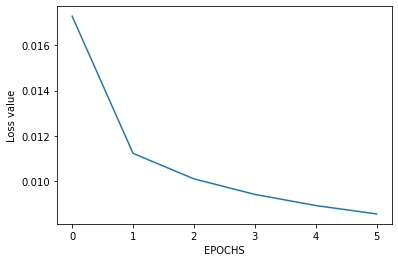

In [5]:

# X_train=np.array([[0,0,1,1],[0,1,0,1]])
# Y_train=np.array([[0,1,1,0]])

m=X_train.shape[1]
batch_size=64
X_mini_batches=[]
Y_mini_batches=[]
num_batches=m//batch_size
for i in range(num_batches):
  x=X_train[:,i*batch_size:(i+1)*(batch_size)]
  y=Y_train[:,i*batch_size:(i+1)*(batch_size)]
  X_mini_batches.append(x)
  Y_mini_batches.append(y)

if m%batch_size!=0:
  index = num_batches*batch_size
  x=X_train[:,index:index+m%batch_size]
  y=Y_train[:,index:index+m%batch_size]
  X_mini_batches.append(x)
  Y_mini_batches.append(y)


errors=[]
iters= 1
gamma1=0.9
gamma2=0.999
eps=1e-8
alpha=0.001
seed=10
t=0

while(iters<=6):
    error=0
    for i in range(len(X_mini_batches)):
      X_train_mini=X_mini_batches[i]
      Y_train_mini=Y_mini_batches[i]
      A,Z=feedforward(params, layers, X_train_mini)
      error+= crossEntropyError(A[-1], Y_train_mini)
      #error=squaredError(A[-1],Y_train)
      gradients=backwardPropagate(params, layers,Z, A, alpha, Y_train_mini)
      t=t+1
      updateWeights(params, gradients, layers, alpha,gamma1,gamma2,eps,t)
    if(iters<=10):
      errors.append(error/m)
      print(error/m,iters)
    elif(iters%10==0):
      errors.append(error/m)
      print(error/m,iters)
    iters+=1
   
#A,Z=feedforward(params, layers, X_train)
#print(A[-1])

plt.plot(errors)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [7]:


A,Z=feedforward(params, layers, X_train)
pred=A[-1]
max_index = np.argmax(pred, axis=0)
count=0
for i in range(60000):
    if(Y[i,0]==max_index[i]):
        count+=1
print("train accuracy: ",(count/60000)*100)
        
    
A,Z=feedforward(params, layers, X_test)
pred=A[-1]
max_index = np.argmax(pred, axis=0)
count=0
for i in range(10000):
    if(Y_test[i]==max_index[i]):
        count+=1
print("test accuracy: ",(count/10000)*100)


train accuracy:  89.23
test accuracy:  86.94
